In [1]:
import sys
import os

import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import datetime
from datetime import datetime, timedelta

# This allows us to import tools from the dvm-dos-tem/scripts directory
sys.path.insert(0, '/work/scripts')
import output_utils as ou
from output_utils import load_trsc_dataframe #loads transient and scenario data, columns are layers

In [2]:
def plot_data(site_folder, run_folder, timeres, output_var, y, x, layer, year, end_year):
    '''
    This will plot UNSYNTHESIZED/UN-INTERPOLATED data, ie; for all layers. 
    loads and plots data on a yearly basis (regardless of time res of data)
    '''
    os.chdir('/data/workflows/'+site_folder+'/'+run_folder)
    if timeres=='monthly':
        df, meta = load_trsc_dataframe(var=output_var, timeres='monthly', px_y=y, px_x=x, fileprefix='output')
        df_yearly = df.resample('Y').mean()
    elif timeres=='yearly':
        df_yearly, meta = load_trsc_dataframe(var=output_var, timeres='yearly', px_y=y, px_x=x, fileprefix='output')
    else: 
        print('Specified Time Resolution not recognized - use monthly or yearly data')
    try:
        plt.plot(df_yearly.loc[year:end_year].index, df_yearly.loc[year:end_year][layer], label=output_var)
    except:
        plt.plot(df_yearly.loc[year:end_year].index, df_yearly.loc[year:end_year], label=output_var)
    plt.xlabel('Year')
    plt.ylabel(output_var+'({})'.format(meta['var_units']))
    return df_yearly

def plot_synth_data(df,output_var, y, x, layer=0,year=1901, end_year=2015):
    '''
    This will plot DEPTH INTERPOLATED data, ie; for depths specified in Output_Synthesis_Valeria.sh
    '''
    tlayer = df[output_var]
    time = df['time'][:]
    base_date = datetime(year, month=1, day=1)  
    time = [base_date + timedelta(days=int(t)) for t in time]
    filtered_time = [t for t in time if t.year <= end_year]
    plt.plot(filtered_time, tlayer[:len(filtered_time), y, x, layer])  # Assuming you want to plot the first spatial point (0, 0)
    plt.xlabel('Time (Years)')
    plt.ylabel(output_var)
    return 

### No DSL:
DSL = dynamic soil layering module
This module contains the set of equations that relate C stocks to layer thickness. If C stocks are too small in a given layer, they may be merged with other layers - this causes the layers to be reordered. Turning off the dsl module removes the appearance of spikes in the layerdepth data

##### To Turn off DSL: 
    - change all instances of runner.cohort.md->set_dslmodule(true);  to runner.cohort.md->set_dslmodule(false);  in TEM.cpp in the src directory - and then recompile.
    - layer thicknesses should then match the values in the parameter files cmt_dimground.txt
    
NOTE: Model runs with DSL turned off are tagged "nodsl" in the workflow folder name

Trying to open:  output/ALD_yearly_tr.nc
Trying to open:  output/ALD_yearly_sc.nc
Trying to open:  output/ALD_yearly_tr.nc
Trying to open:  output/ALD_yearly_sc.nc


Text(0.5, 1.0, 'Deep Soil branch')

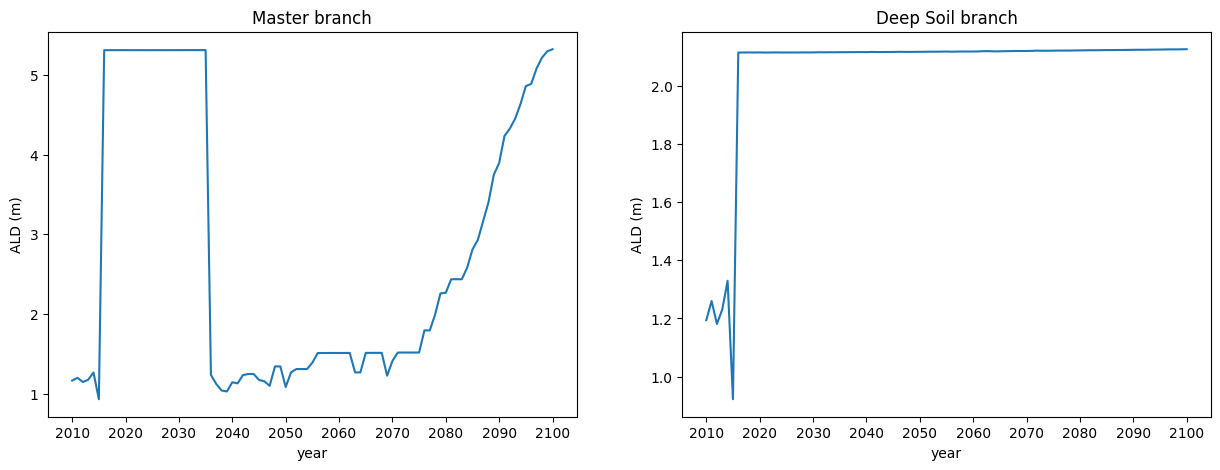

In [3]:
#PLOT ALD

# df_yearly, df_ds, df_yearly_m, df_m=plot_experiment('ALD','MD_deep_soil',0)

fig, ax = plt.subplots(1,2,figsize=(15, 5))

#Plot master branch run
os.chdir('/data/workflows/MD_deep_soil/control')
df, meta = load_trsc_dataframe(var='ALD', timeres='yearly', px_y=0, px_x=0, fileprefix='output')
ax[0].plot(df.loc['2010':'2100'].index, df.loc['2010':'2100'][0], label='ALD')
ax[0].set_xlabel('year')
ax[0].set_ylabel('ALD ({})'.format(meta['var_units']))
ax[0].set_title('Master branch')

#plot deep soil branch run
os.chdir('/data/workflows/MD_deep_soil/experiment')
df, meta = load_trsc_dataframe(var='ALD', timeres='yearly', px_y=0, px_x=0, fileprefix='output')
ax[1].plot(df.loc['2010':'2100'].index, df.loc['2010':'2100'][0], label='ALD')
ax[1].set_xlabel('year')
ax[1].set_ylabel('ALD ({})'.format(meta['var_units']))
ax[1].set_title('Deep Soil branch')

Trying to open:  output/LAYERDEPTH_monthly_tr.nc
Trying to open:  output/LAYERDEPTH_monthly_sc.nc


Text(0.5, 1.0, 'BNZ_deep_soil Pixel 0,0')

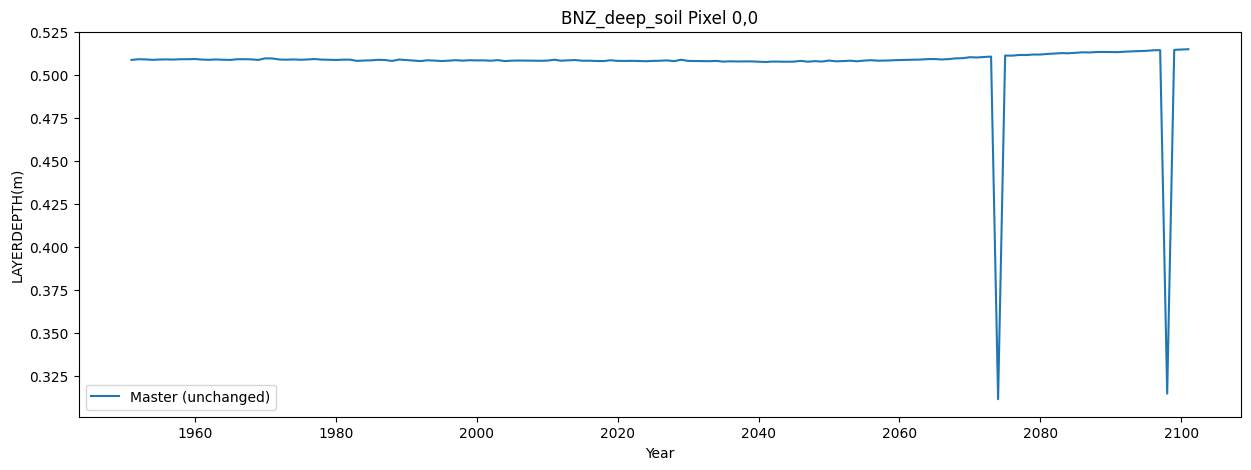

In [4]:
folder='BNZ_deep_soil'
run_folder_control='control_allout_monthly_00px'
run_folder_experiment='experiment_allout_monthly_00px'
output_var='LAYERDEPTH'
layer=7
year='1950'
end_year='2100'
px_y=0
px_x=0

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
# plot_data(folder, run_folder_experiment, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'Deep Soil'])
plt.title(folder+' Pixel 0,0')

Trying to open:  output/RH_monthly_tr.nc
Trying to open:  output/RH_monthly_sc.nc
Trying to open:  output/RH_monthly_tr.nc
Trying to open:  output/RH_monthly_sc.nc


Text(0.5, 1.0, 'BNZ_deep_soil Pixel 1,1')

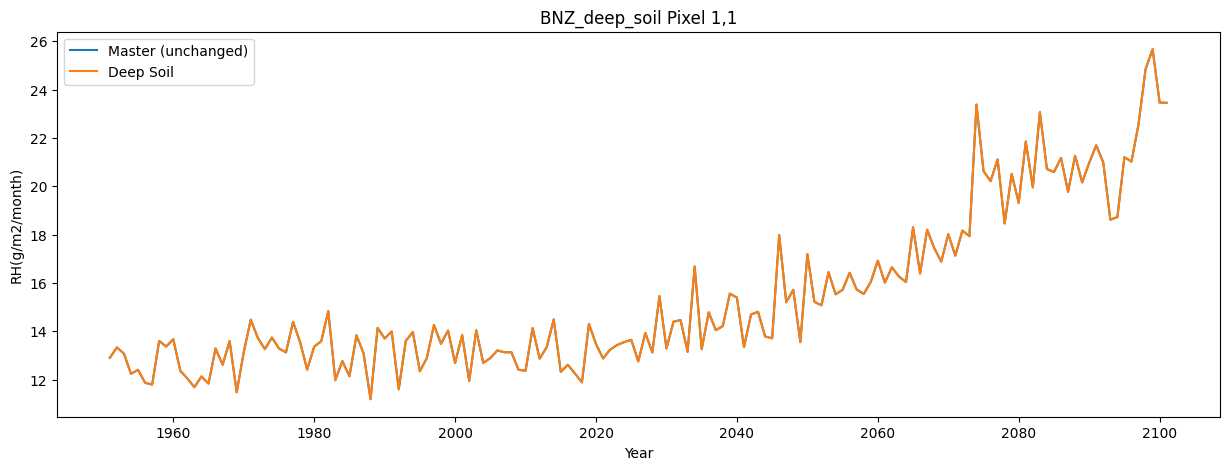

In [35]:
folder='BNZ_deep_soil'
run_folder_control='control_allout_monthly_11px'
run_folder_experiment='experiment_allout_monthly_11px'
output_var='RH'
layer=7
year='1950'
end_year='2100'
px_y=1
px_x=1

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
plot_data(folder, run_folder_experiment, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'Deep Soil'])
plt.title(folder+' Pixel 1,1')

Trying to open:  output/SHLWC_monthly_tr.nc
Trying to open:  output/SHLWC_monthly_sc.nc


Text(0.5, 1.0, 'MD_deep_soil Pixel 1,1, cmt 1')

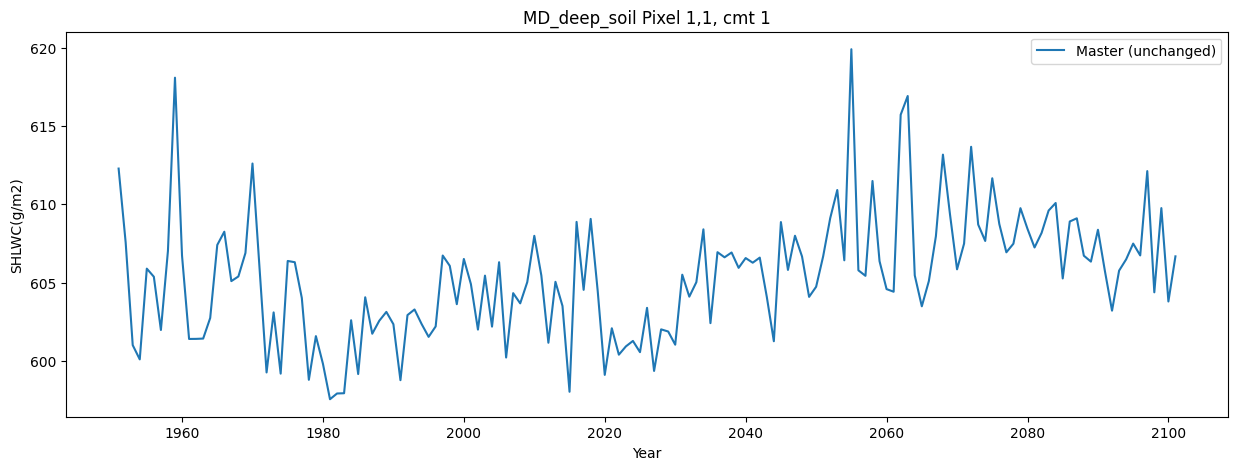

In [44]:
folder='MD_deep_soil'
run_folder_control='control_allout_monthly_11px'
run_folder_experiment='experiment_allout_monthly_11px'
output_var='SHLWC'
layer=15
year='1950'
end_year='2100'
px_y=1
px_x=1

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
# plot_data(folder, run_folder_experiment, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'Deep Soil'])
plt.title(folder+' Pixel 1,1, cmt 1')

Trying to open:  output/SHLWC_monthly_tr.nc
Trying to open:  output/SHLWC_monthly_sc.nc


Text(0.5, 1.0, ' MD with dsl on Pixel 1,1, cmt 31')

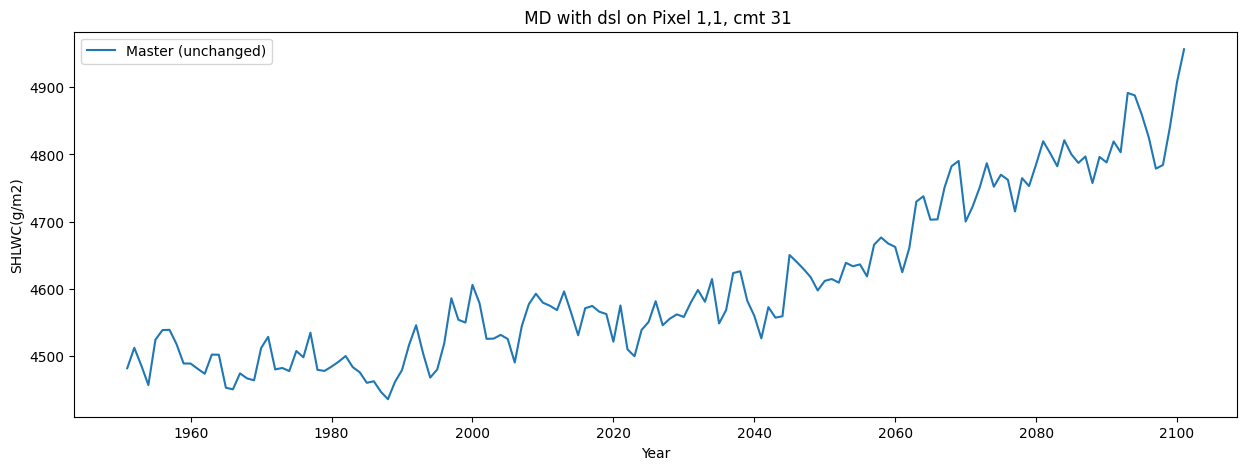

In [45]:
folder='MD_deep_soil'
run_folder_control='control_allout_monthly_11px_31'
# run_folder_experiment='experiment_allout_monthly_11px'
output_var='SHLWC'
layer=15
year='1950'
end_year='2100'
px_y=1
px_x=1

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
# plot_data(folder, run_folder_experiment, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'Deep Soil'])
plt.title(' MD with dsl on Pixel 1,1, cmt 31')

Trying to open:  output/SHLWC_monthly_tr.nc
Trying to open:  output/SHLWC_monthly_sc.nc


Text(0.5, 1.0, ' MD with dsl on Pixel 1,1, cmt 2')

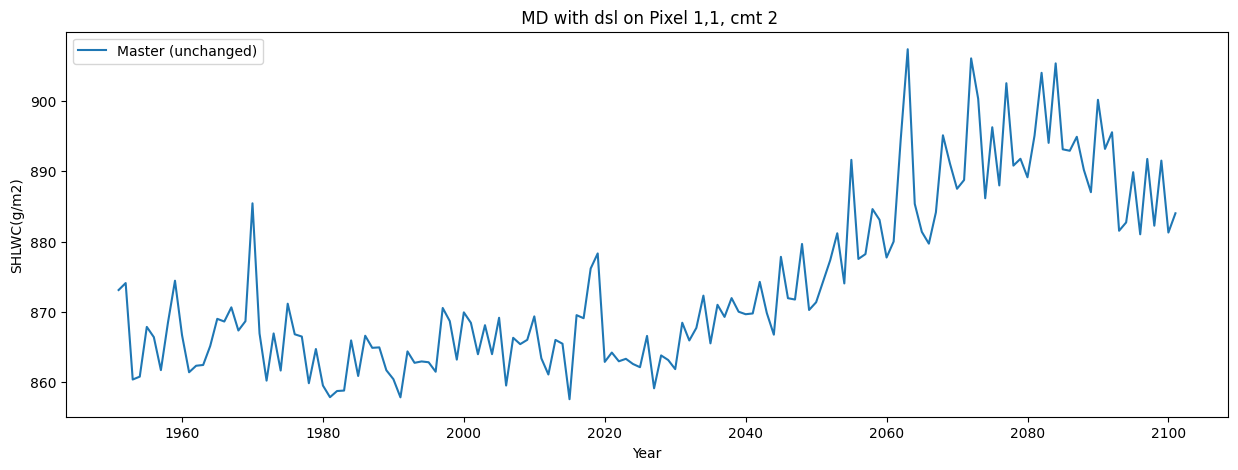

In [48]:
folder='MD_deep_soil'
run_folder_control='control_allout_monthly_11px_2'
# run_folder_experiment='experiment_allout_monthly_11px'
output_var='SHLWC'
layer=15
year='1950'
end_year='2100'
px_y=1
px_x=1

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
# plot_data(folder, run_folder_experiment, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'Deep Soil'])
plt.title(' MD with dsl on Pixel 1,1, cmt 2')

Trying to open:  output/LTRFALC_monthly_tr.nc
Trying to open:  output/LTRFALC_monthly_sc.nc
Trying to open:  output/LAYERDEPTH_monthly_tr.nc
Trying to open:  output/LAYERDEPTH_monthly_sc.nc


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1901-12-31,0.0,0.01,0.038280,0.122166,0.222166,0.322166,0.422166,0.522166,0.722166,0.922166,...,1.722166,2.022166,2.322166,2.822166,3.322166,4.322166,-9999.000000,-9999.0,-9999.0,-9999.0
1902-12-31,0.0,0.01,0.037751,0.065743,0.121726,0.221726,0.321726,0.421726,0.521726,0.721726,...,1.421726,1.721726,2.021726,2.321726,2.821726,3.321726,4.321726,-9999.0,-9999.0,-9999.0
1903-12-31,0.0,0.01,0.038101,0.122060,0.222060,0.322060,0.422060,0.522060,0.722060,0.922060,...,1.722060,2.022060,2.322060,2.822060,3.322060,4.322060,-9999.000000,-9999.0,-9999.0,-9999.0
1904-12-31,0.0,0.01,0.039029,0.123116,0.223116,0.323116,0.423116,0.523116,0.723116,0.923116,...,1.723116,2.023116,2.323116,2.823116,3.323116,4.323116,-9999.000000,-9999.0,-9999.0,-9999.0
1905-12-31,0.0,0.01,0.038478,0.122670,0.222670,0.322670,0.422670,0.522670,0.722670,0.922670,...,1.722670,2.022670,2.322670,2.822670,3.322670,4.322670,-9999.000000,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096-12-31,0.0,0.01,0.038212,0.069129,0.130965,0.230965,0.330965,0.430965,0.530965,0.730965,...,1.430965,1.730965,2.030965,2.330965,2.830965,3.330965,4.330965,-9999.0,-9999.0,-9999.0
2097-12-31,0.0,0.01,0.038462,0.069421,0.131338,0.231338,0.331338,0.431338,0.531338,0.731338,...,1.431338,1.731338,2.031338,2.331338,2.831338,3.331338,4.331338,-9999.0,-9999.0,-9999.0
2098-12-31,0.0,0.01,0.038139,0.069133,0.131121,0.231121,0.331121,0.431121,0.531121,0.731121,...,1.431121,1.731121,2.031121,2.331121,2.831121,3.331121,4.331121,-9999.0,-9999.0,-9999.0
2099-12-31,0.0,0.01,0.038262,0.069290,0.131347,0.231347,0.331347,0.431347,0.531347,0.731347,...,1.431347,1.731347,2.031347,2.331347,2.831347,3.331347,4.331347,-9999.0,-9999.0,-9999.0


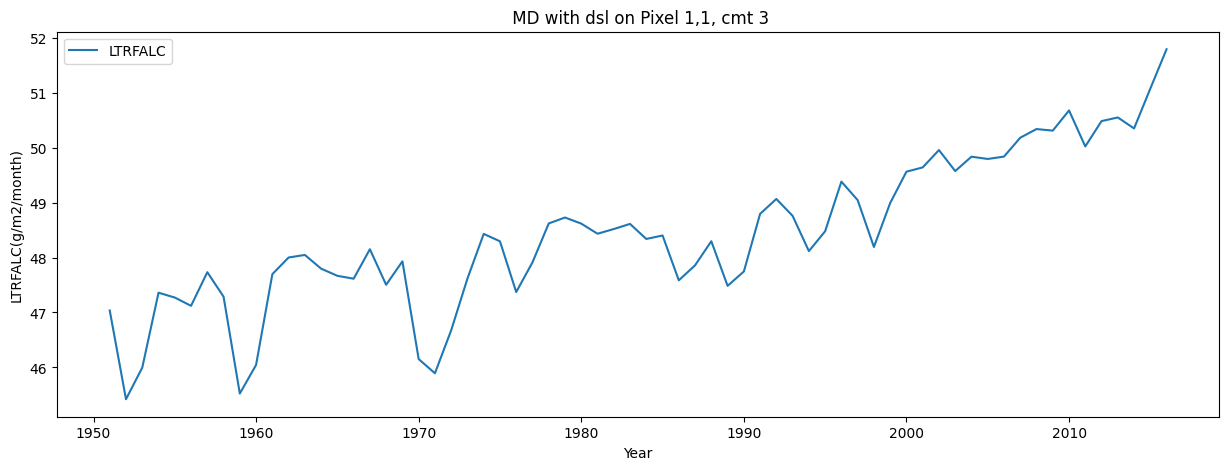

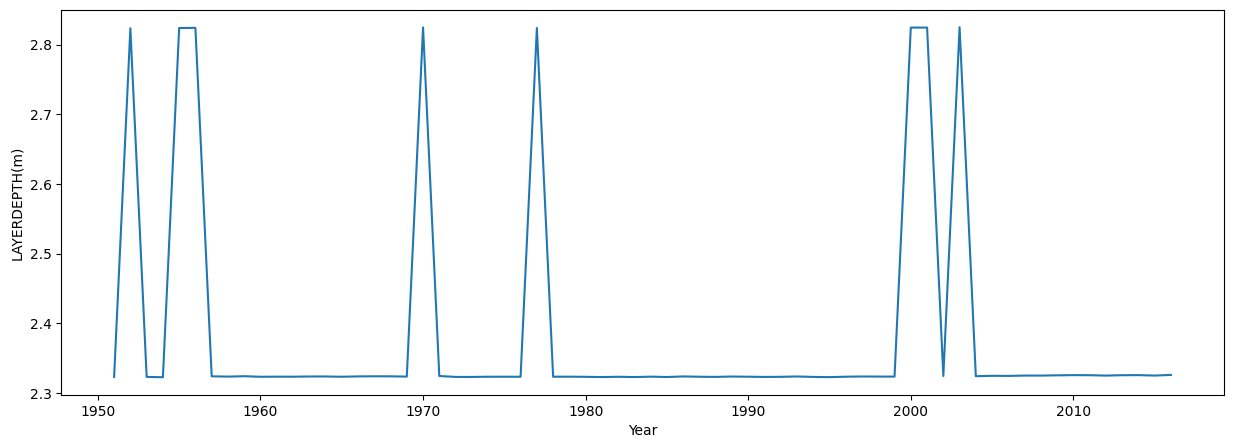

In [65]:
folder='MD_deep_soil'
run_folder_control='control_allout_monthly_11px_3'
output_var='LTRFALC'
layer=15
year='1950'
end_year='2015'
px_y=1
px_x=1

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['LTRFALC', 'LAYERDEPTH'])
plt.title(' MD with dsl on Pixel 1,1, cmt 3')

fig, ax = plt.subplots(1,1,figsize=(15, 5))
plot_data(folder, run_folder_control, 'monthly', 'LAYERDEPTH', px_y, px_x, layer, year, end_year)


Trying to open:  output/LAYERDEPTH_monthly_tr.nc
Trying to open:  output/LAYERDEPTH_monthly_sc.nc


Text(0.5, 1.0, 'BNZ_deep_soil Pixel 3,4')

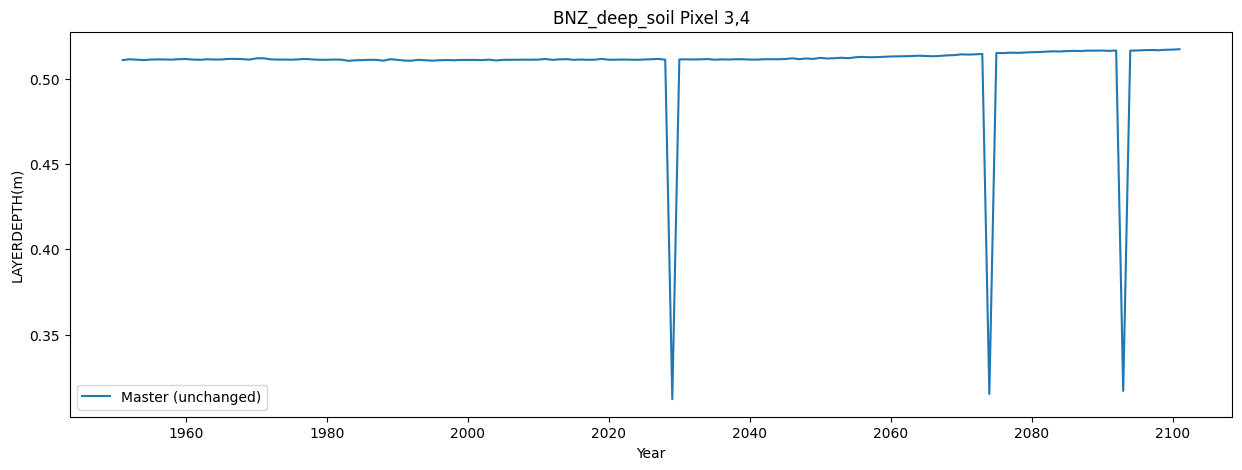

In [7]:
folder='BNZ_deep_soil'
run_folder_control='control_allout_monthly_34px'
run_folder_experiment='experiment_allout_monthly_34px'
output_var='LAYERDEPTH'
layer=7
year='1950'
end_year='2100'
px_y=3
px_x=4

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
# plot_data(folder, run_folder_experiment, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'Deep Soil'])
plt.title(folder+' Pixel 3,4')

Trying to open:  output/LAYERDEPTH_monthly_tr.nc
Trying to open:  output/LAYERDEPTH_monthly_sc.nc
Trying to open:  output/LAYERDEPTH_monthly_tr.nc
Trying to open:  output/LAYERDEPTH_monthly_sc.nc


Text(0.5, 1.0, 'MD_deep_soil Pixel 1,1')

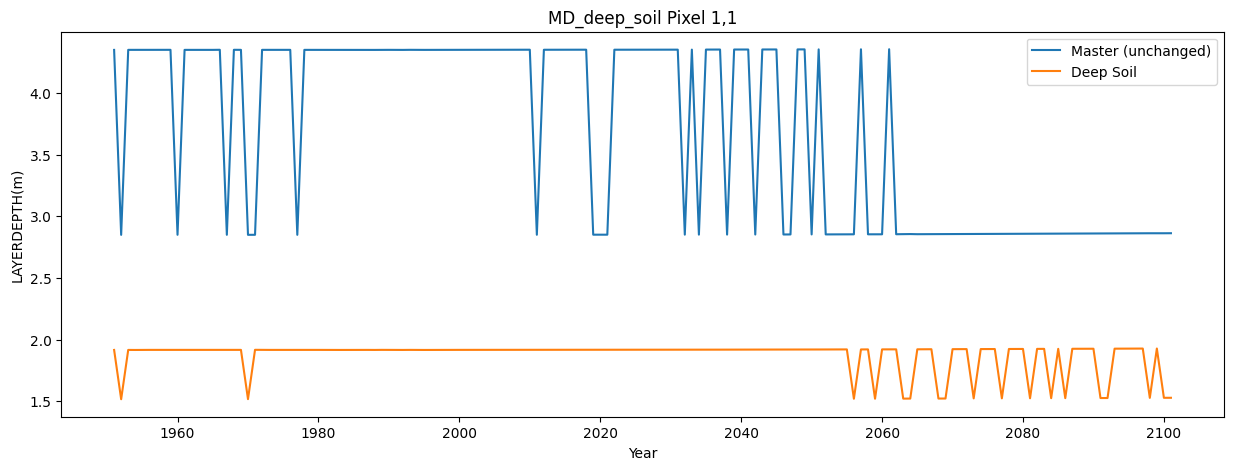

In [8]:
#WITH UPDATED COEFFICIENTS
folder='MD_deep_soil'
run_folder_control='control_allout_monthly_11px'
run_folder_experiment='experiment_allout_monthly_11px'
output_var='LAYERDEPTH'
layer=17
year='1950'
end_year='2100'
px_y=1
px_x=1

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
plot_data(folder, run_folder_experiment, 'monthly', output_var, px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'Deep Soil'])
plt.title(folder+' Pixel 1,1')

Trying to open:  output/SHLWC_monthly_tr.nc
Trying to open:  output/SHLWC_monthly_sc.nc


Text(0.5, 1.0, 'MD Pixel 3,4')

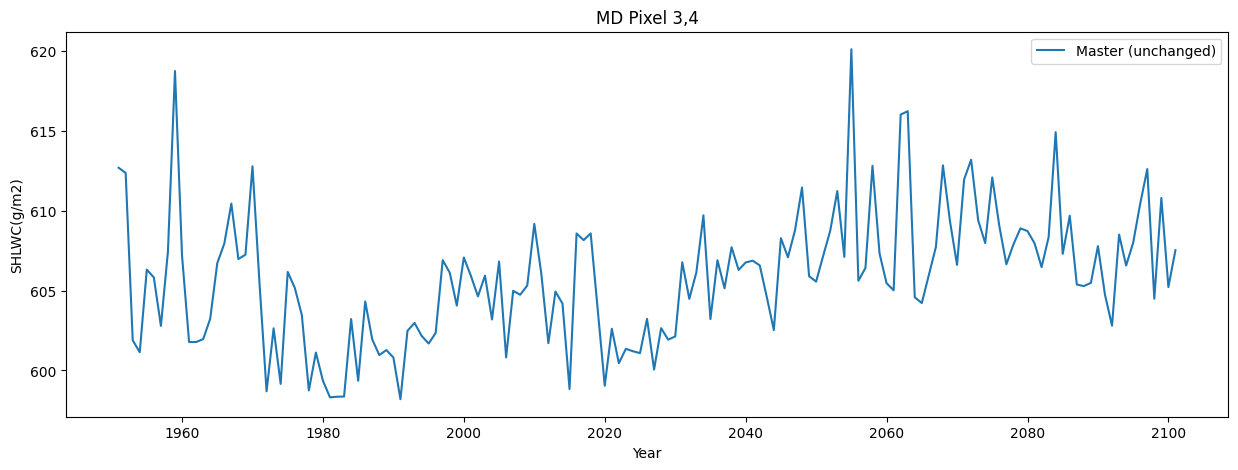

In [22]:
folder='MD_deep_soil'
run_folder_control='control_allout_monthly_34px'
# run_folder_experiment='control_allout_monthly_34px_nodsl'
output_var='SHLWC'
layer=2
year='1950'
end_year='2100'
px_y=3
px_x=4

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', output_var, px_y, px_x, layer, year, end_year)
# plot_data(folder, run_folder_experiment, 'monthly', 'LAYERDEPTH', px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'No DSL module'])
plt.title('MD Pixel 3,4')

Trying to open:  output/LAYERDEPTH_monthly_tr.nc
Trying to open:  output/LAYERDEPTH_monthly_sc.nc
Trying to open:  output/LAYERDEPTH_monthly_tr.nc
Trying to open:  output/LAYERDEPTH_monthly_sc.nc


Text(0.5, 1.0, 'MD Pixel 3,4')

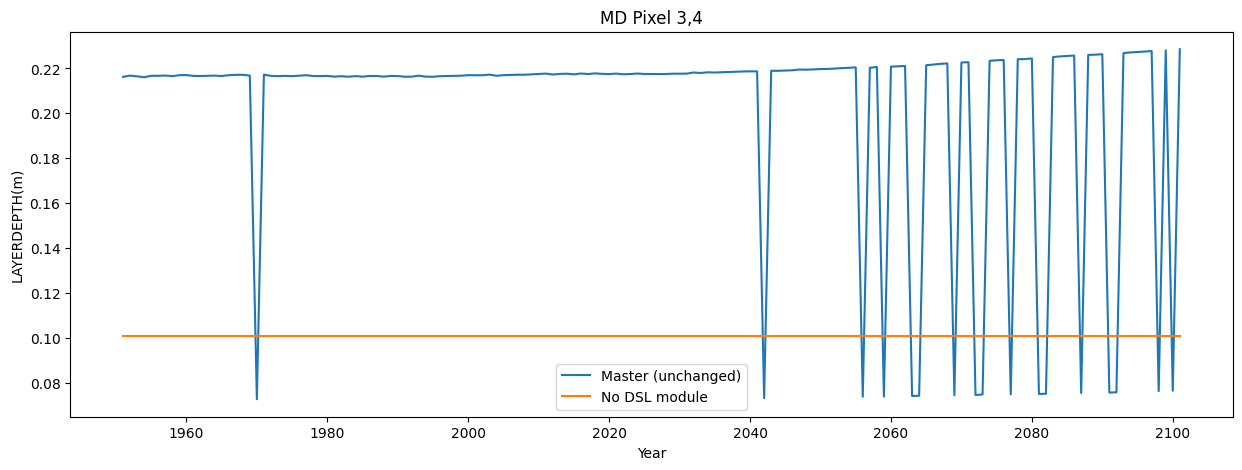

In [10]:
folder='MD_deep_soil'
run_folder_control='control_allout_monthly_34px'
run_folder_experiment='control_allout_monthly_34px_nodsl'
output_var='SHLWC'
layer=4
year='1950'
end_year='2100'
px_y=3
px_x=4

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plot_data(folder, run_folder_control, 'monthly', 'LAYERDEPTH', px_y, px_x, layer, year, end_year)
plot_data(folder, run_folder_experiment, 'monthly', 'LAYERDEPTH', px_y, px_x, layer, year, end_year)
ax.legend(['Master (unchanged)', 'No DSL module'])
plt.title('MD Pixel 3,4')